This is a notebook on setting up PFOS for simulation. This is absolutely awful and I beg anyone who wishes to attempt this to re-evaluate their choices. Wait until UA is updated for more force fields, or CHARMM is adjusted for non-bio molecules.

The largest issue consitently was the forcefields and topology files so please be careful

# Simulation

First we need the SMILES code for PFOS. This can be got from a simple google seach giving 

` C(=O)(C(C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)O `

Now that we have a PDB file we can use the `MoltoFragments.py` script inside the `tools` folder in `NPCoronaPredict`.

` python MolToFragments.py -m PFOSTest1 -s "FC(F)(C(F)(F)S(=O)(=O)O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F" `

This will generate 3 fragments with SMILES codes. These fragments are our beads for coarse graining.
As mentioned in the original paper, we willa adjust the ` O=[SH](=O)O ` fragment to a sulfonic ion. This is done by removing the H. 

Now that we have our smiles codes, we can create our files. This is done using [acpype server](https://www.bio2byte.be/acpype/). We can enter our fragements as SMILE or use a SMILES to PDB converter, [example](https://www.novoprolabs.com/tools/smiles2pdb). We must do this for our 3 fragments and the Polypropylene. Download the outputs and prepare a folder for everything.

The downloads contain all the releveant information about the molecules, charge, bonds etc. We need to combine one fragment with a polypropylene. This can be done by just copying and pasting the contents of one `.gro` box into another. However make sure there are no atom overlaps, this can be accomplished by just adding $10$ nm to all atom positions in one file. You then must update the topology files with the correct info, atom numbers and what not. You can download all GAFF forcefields [here](https://github.com/openmm/openmmforcefields). Please download all that are relevant to a seperate folder or directory, this way you can copy and past the relevant folders into a `toppar` folder, as done in my files.

Once you have your combined `.gro` box, we can once again solvate with TIP3P water and 0.15M NaCl. Make sure you include your ions in your topology file. From here we are in familiar terrotory, we "just" need to minimize, NVT, NPT and production run. 

Errors will most likely occur in the minimize function if there are issue with your `.top`. This is often just not defining the relavent atoms or linking to the correct folder in `toppar`. Once you pass minimisation everything should be fine.

# NPCorona Predict

Once we acquire the relevant pmfs we must repeat the procedure of the original AA to get the system ready simulations. However unlike before we must do this manually as UA does not recognise our beads

We will now be working entirely in NPCoronaPredict folder, make sure you perform a `git pull` to make sure everything is up to date before beginning.

Step 1: Assign a three-character code to each of the bead types. I'm going to suggest you use PF1 = FCF, PF2 = FC(F)F and PF3 = O=[S-](=O)O.

Step 2: Load up your CG structure for PFOS - this will be located in tools/CGMolecules. My version looks like this:

HEADER PFOSTest1    

TITLE   PFOSTest1

REMARK SMILES: O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F

REMARK Generated: 2025-05-26 16:24:12

REMARK Method: EqualParts

REMARK 0:PFOSTest1New0:!!!:FCF

REMARK 1:PFOSTest1New0:!!!:FCF

REMARK 2:PFOSTest1New0:!!!:FCF

REMARK 3:PFOSTest1New0:!!!:FCF

REMARK 4:PFOSTest1New0:!!!:FCF

REMARK 5:PFOSTest1New0:!!!:FCF

REMARK 6:PFOSTest1New1:!!!:FC(F)F

REMARK 7:PFOSTest1New2:!!!:O=[SH](=O)O

REMARK 8:PFOSTest1New0:!!!:FCF

ATOM      0  CA  !!! A   1        2.17    1.12    1.04  1.00  0.00           C

ATOM      1  CA  !!! A   2        0.98 -0.0677  -0.764  1.00  0.00           C

ATOM      2  CA  !!! A   3      -0.334   0.892    1.04  1.00  0.00           C

ATOM      3  CA  !!! A   4       -1.41  -0.382  -0.683  1.00  0.00           C

ATOM      4  CA  !!! A   5       -2.72   0.613    1.09  1.00  0.00           C

ATOM      5  CA  !!! A   6       -4.32  -0.788   0.463  1.00  0.00           C

ATOM      6  CA  !!! A   7       -4.54 -0.0833   -1.65  1.00  0.00           C

ATOM      7  CA  !!! A   8        4.21   -1.42  -0.308  1.00  0.00           C

ATOM      8  CA  !!! A   9         3.9    1.01  -0.317  1.00  0.00           C

END


Now we need to replace the !!! in each of the ATOM lines with the appropriate bead code (use the REMARK lines to help you figure out which atom is which bead). After this, I get this:

HEADER PFOSTest1                              

TITLE   PFOSTest1

REMARK SMILES: O=S(=O)(O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F

REMARK Generated: 2025-05-26 16:24:12

REMARK Method: EqualParts

REMARK 0:PFOSTest1New0:!!!:FCF

REMARK 1:PFOSTest1New0:!!!:FCF

REMARK 2:PFOSTest1New0:!!!:FCF

REMARK 3:PFOSTest1New0:!!!:FCF

REMARK 4:PFOSTest1New0:!!!:FCF

REMARK 5:PFOSTest1New0:!!!:FCF

REMARK 6:PFOSTest1New1:!!!:FC(F)F

REMARK 7:PFOSTest1New2:!!!:O=[SH](=O)O

REMARK 8:PFOSTest1New0:!!!:FCF

ATOM      0  CA  PF1 A   1        2.17    1.12    1.04  1.00  0.00           C

ATOM      1  CA  PF1 A   2        0.98 -0.0677  -0.764  1.00  0.00           C

ATOM      2  CA  PF1 A   3      -0.334   0.892    1.04  1.00  0.00           C

ATOM      3  CA  PF1 A   4       -1.41  -0.382  -0.683  1.00  0.00           C

ATOM      4  CA  PF1 A   5       -2.72   0.613    1.09  1.00  0.00           C

ATOM      5  CA  PF1 A   6       -4.32  -0.788   0.463  1.00  0.00           C

ATOM      6  CA  PF2 A   7       -4.54 -0.0833   -1.65  1.00  0.00           C

ATOM      7  CA  PF3 A   8        4.21   -1.42  -0.308  1.00  0.00           C

ATOM      8  CA  PF1 A   9         3.9    1.01  -0.317  1.00  0.00           C

END

This is now a valid UA input pdb structure - it'll read this in and generate PF1/PF2/PF3 beads at the appropriate positions to roughly recreate the molecules shape. When you're done, save it in the `all_proteins` folder in NPCoronaPredict. 


Step 3: Go into the surface folder in the NPCoronaPredict folder and make a new folder called  "Polypropylene-upscaled-GAFF", if you have use a different force field its fine, just give it a unique and descriptive name. Then copy in the PMFs you've generated for each of the beads, naming them `PF1.dat`, `PF2.dat`, `PF3.dat`.

Step 4: Go into the hamaker folder and make a copy of `Null.dat` and name it something obvious, `PolypropyleneUpscaleGAFF.dat`. Rename three of the rows to whatever the bead names are and delete the rest (this is so UA doesn't get confused when it tries to load in Hamaker data for beads it doesn't understand).

PF1    0.000     0.000E-20     0.000

PF2    0.000     0.000E-20     0.000

PF3    0.000     0.000E-20     0.000

Step 5:  Find a UnitedAtom config file - you should have an autogenerated one laying around by this point. Make a copy of it naming it e.g. `pfos_pp.config`, and then start editing:

output-directory = pfos_test

pdb-target = all_proteins/PFOS.pdb

nanoparticle-radius = [40.0]

np-type = 1

pmf-directory = surface/Polypropylene-upscaled-GAFF

hamaker-file = hamaker/PolypropyleneUpscaleGAFF.dat

#standard parameters

enable-surface

enable-core

enable-electrostatic

simulation-steps = 2000

potential-cutoff=5.0

potential-size = 1000

angle-delta = 5.0

bjerum-length=0.716

debye-length=0.785

temperature = 300.0

zeta-potential = [0]

pdb-jitter-magnitude = 0

pmf-cutoff=1.0

#specific parameters for our custom bead types

amino-acids         = [ PF1, PF2, PF3]

amino-acid-charges  = [0.0, 0.0, -1.0]

amino-acid-radii    = [ 0.3, 0.3, 0.3] 


Basically, each bead type you defined needs to have an entry in the bottom three rows so UA can associate a particular three-letter code with a charge and a radius. The bead radius is used in the Hamaker potential which we're ignoring for now. We can adjust the nanoparticle radius as we see fit.

Step 6: Run ./UnitedAtom --config-file=pfos_pp.config
When it runs, it will look for files called XXX.dat in the specified pmf-directory folder for each of the bead tags specified in amino-acids. It will then look for a matching Hamaker entry for each of these. Then, when it reads in a PDB file, it will check all the three-letter codes it finds against those its been told about in the configuration file and either generate a bead of that type if it found both the surface and Hamaker data, or crash. So this is why you need to make sure they all match correctly. Beyond that, it doesn't care if XXX represents an amino acid or whatever. 

In [ ]:
To allow pegylation of the PP-GAFF sphere, add the set upt to MaterialSet.cvs folder correctly directing to the 
hamaker and PMF locations. This will allow you to use the NPDesigner to create Pegylated models if you wanted.

If using a pegylated model, adjust the `pfos_pp.config` to correctly choose the NP, this is done by adding `np-target = nps/PFOS310nm.np`. Just ensure you link to the correct NP file location

# Plots

In [1]:
import os
wd = os.getcwd()
wd

'/Users/brianmaloney/Desktop/MastersProject/githubfiles'

In [4]:
os.chdir("PFOS")

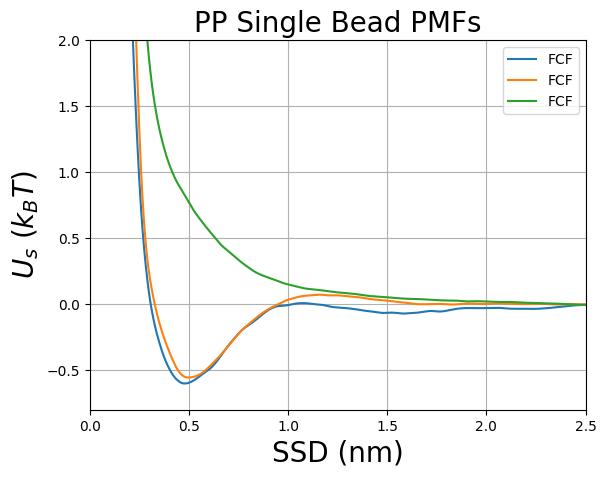

In [6]:
import numpy as np
import matplotlib.pyplot as plt

files = ["PF1", "PF2", "PF3"]
filetoname = {"PF1":"FCF", "PF2":"FCF", "PF3":"FCF"}

# Single PMFs
for file in files:
    data = np.genfromtxt("singlePMF/" + file + ".dat", delimiter=",")

    r = data[:, 0]
    pmf = data[:, 1]
    
    plt.plot(r, pmf, label=filetoname[file])
    
plt.grid(True)
plt.title("PP Single Bead PMFs", fontsize=20)
plt.ylim(-0.8, 2)
plt.xlim(0, 2.5)
plt.xlabel("SSD (nm)", fontsize=20)
plt.ylabel(r"$U_s$ ($k_BT$)", fontsize=20)
plt.legend()
#plt.legend(loc='lower right', ncol=3, fontsize=8, frameon=True, edgecolor='black')
#plt.savefig("../graphs/singlePFOS.pdf", format="pdf")
plt.show()


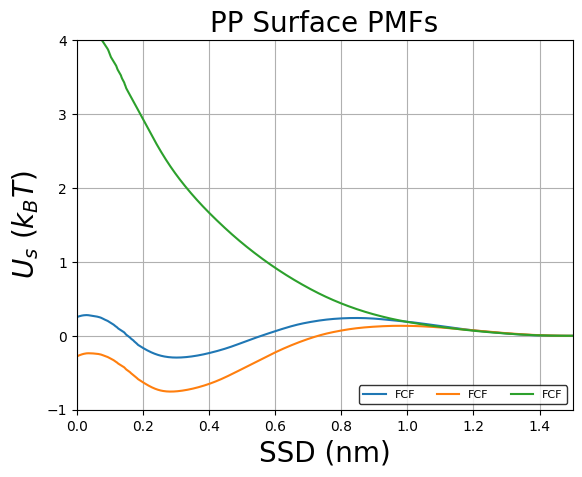

In [8]:
# Upscaled PMFs
for file in files:
    data = np.genfromtxt("planePMF/" + file + ".dat", delimiter=",")

    r = data[:, 0]
    pmf = data[:, 1]* 0.403
    
    plt.plot(r, pmf, label=filetoname[file])
    
plt.grid(True)
plt.title("PP Surface PMFs", fontsize=20)
plt.ylim(-1, 4)
plt.xlim(0, 1.5)
plt.xlabel("SSD (nm)", fontsize=20)
plt.ylabel(r"$U_s$ ($k_BT$)", fontsize=20)
plt.legend()
plt.legend(loc='lower right', ncol=3, fontsize=8, frameon=True, edgecolor='black')
#plt.savefig("../graphs/surfacePFOS.pdf", format="pdf")
plt.show()

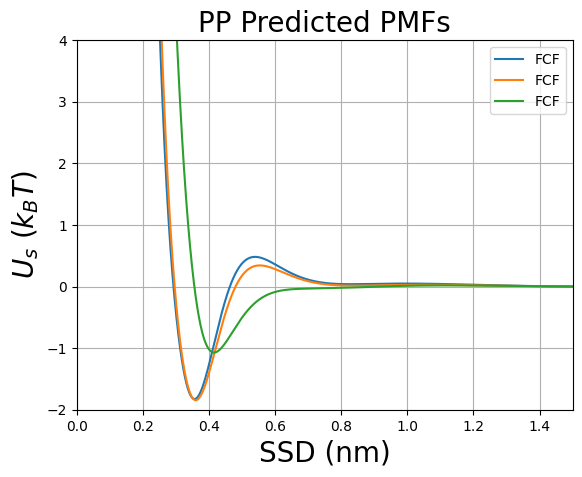

In [9]:
# Predicted PMFs
for file in files:
    data = np.genfromtxt("predictPMF/" + file + ".dat", delimiter=",")

    r = data[:, 0]
    pmf = data[:, 1]* 0.403
    
    plt.plot(r, pmf, label=filetoname[file])
    
plt.grid(True)
plt.title("PP Predicted PMFs", fontsize=20)
plt.xlabel("SSD (nm)", fontsize=20)
plt.ylabel(r"$U_s$ ($k_BT$)", fontsize=20)
plt.ylim(-2, 4)
plt.xlim(0, 1.5)
plt.legend()
#plt.legend(loc='lower right', ncol=3, fontsize=8, frameon=True, edgecolor='black')
#plt.savefig("../graphs/predictedPFOS.pdf", format="pdf")
plt.show()

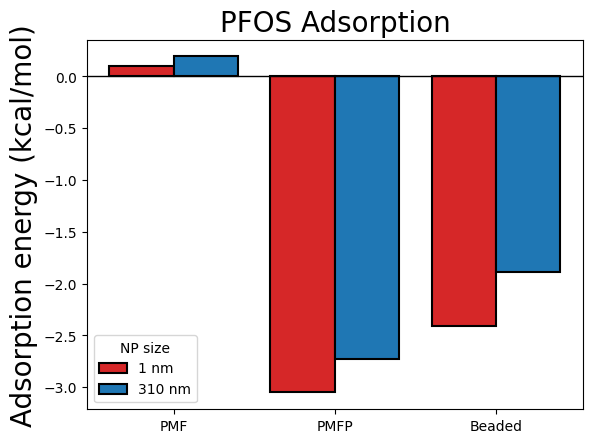

In [10]:
# Histogram

xL = [0.1, -3.05, -2.41]
xR = [0.193, -2.728, -1.885]
binL = ["PMF","PMFP","Beaded"]
binR = ["PMF","PMFP","Beaded"]

fig, ax = plt.subplots()
bar_labelL = ['1 nm', '_1nm', '_1nm']
bar_labelR = ['310 nm', '_310nm', '_310nm']
bar_colorsL = ['tab:red', 'tab:red', 'tab:red']
bar_colorsR = ['tab:blue','tab:blue','tab:blue']

ax.bar(binL, xL, width=-0.4, label=bar_labelL, color=bar_colorsL, edgecolor = 'black', linewidth = 1.5, align='edge')
ax.bar(binR, xR, width=0.4, label=bar_labelR, color=bar_colorsR, edgecolor = 'black', linewidth = 1.5, align='edge')
ax.axhline(y=0, linewidth=1, color='k')

ax.set_ylabel('Adsorption energy (kcal/mol)', fontsize=20)
ax.set_title('PFOS Adsorption', fontsize=20)
ax.legend(title='NP size')
#plt.savefig("../graphs/PFOSads.pdf", format = "pdf")
plt.show()